In [6]:
# implementation
#data generation
import numpy as np
X=np.array([0,3,6,8])
Y=np.array([35,45,65,80])

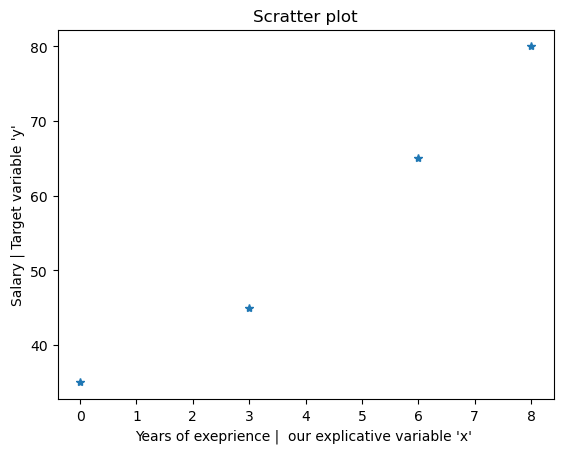

In [7]:
import matplotlib.pyplot as plt 
plt.plot(X,Y,'*')
plt.xlabel("Years of exeprience |  our explicative variable 'x' ")
plt.ylabel("Salary | Target variable 'y'")
plt.title("Scratter plot")
plt.savefig("./intuitive_scatter.png")

In [8]:
def reg_plot(x, y, m):
    # Crée un graphique de dispersion des données
    plt.scatter(x, y, c='blue', label="nos données")
    
    # Trace la courbe de prédiction basée sur le modèle de régression
    plt.plot(x, m.predict(x.reshape(-1, 1)), color='red', label="courbe de prédiction")
    
    # Ajoute une étiquette à l'axe des x
    plt.xlabel("variable explicative 'x'")
    
    # Ajoute une étiquette à l'axe des y
    plt.ylabel("variable cible 'y'")
    
    # Affiche la légende pour identifier les courbes
    plt.legend()
    
    # La fonction ne retourne rien
    return None


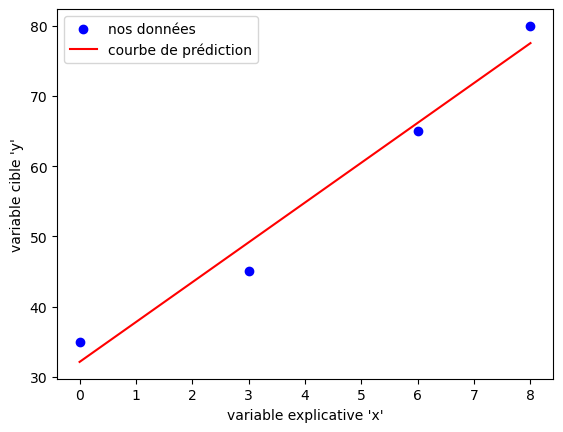

In [9]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X.reshape(-1, 1),Y)
reg_plot(X,Y,linear_model)
plt.savefig("./approche_intuitive.png")

In [10]:
# Example with more data
import numpy as np 
x=np.arange(75)
delta = np.random.uniform(-10,10, size=(75,))
y = 0.4 * x +3 + delta

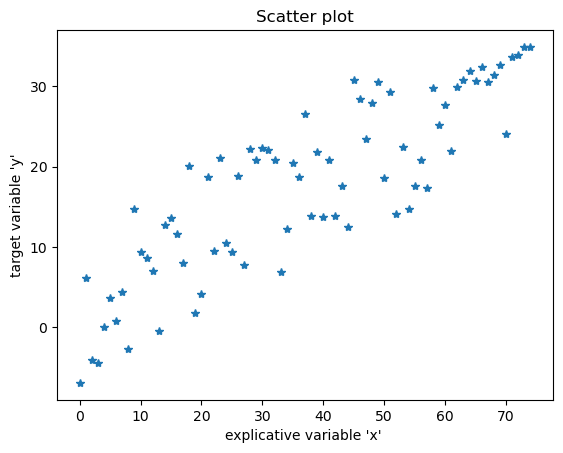

In [11]:
# Fast visualization of data with the plot() function of the matplotlib library
plt.plot(x,y,"*")
plt.xlabel("explicative variable 'x' ")
plt.ylabel("target variable 'y'")
plt.title("Scatter plot")
plt.savefig("./intuitive_scatter_bis.png")

### Using the scikit-learn library

In [12]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
#we are using the reshape function to convert the 1D array to a 2D array which is an obligation in scikit-learn LinearRegression() cf official doc
linear_model.fit(x.reshape(-1, 1),y)

LinearRegression()

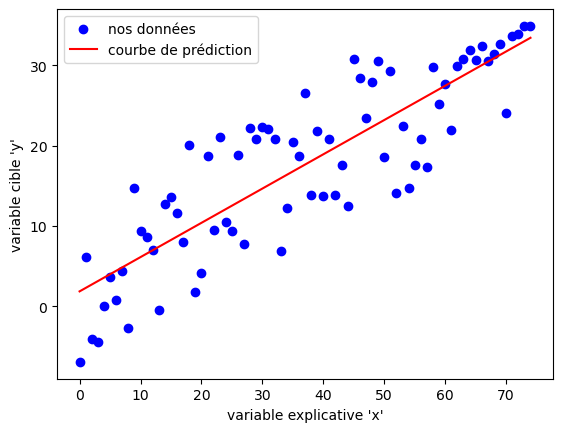

In [13]:
reg_plot(x,y,linear_model)
plt.savefig("./prediction.png")

### Practical example: predict the salary based on years of exeprience

In [14]:
import pandas as pd 
df = pd.read_csv("./Salary_Data.csv", sep=',')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


Nous sélectionnons la variable à prédire et la variable explicative avec un masque Pandas comme suit :

PS : Dans notre cas, nous avons seulement deux colonnes dans cet ensemble de données et une seule variable explicative, mais en général, nous pouvons en avoir plusieurs. Nous verrons cela dans la prochaine section sur la régression multiple.

In [15]:
df=df[["YearsExperience","Salary"]]

Nous allons maintenant afficher le nuage de points pour voir s'il est pertinent de corréler ces deux variables.

Text(0.5, 1.0, 'Years of experience vs Salary')

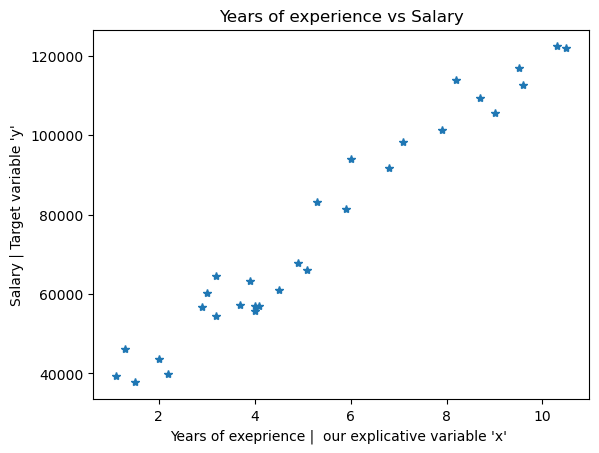

In [16]:
X=df.YearsExperience
Y=df.Salary
plt.plot(X,Y,'*')
plt.xlabel("Years of exeprience |  our explicative variable 'x' ")
plt.ylabel("Salary | Target variable 'y'")
plt.title("Years of experience vs Salary")


Nous importons maintenant l'estimateur LinearRegression pour ajuster notre modèle sur les données.

🚧 Faites attention à ne pas oublier la méthode .reshape(-1, 1) car votre variable explicative est en une dimension 🚧

In [17]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

In [18]:
linear_model.fit(np.array(X).reshape(-1, 1),np.array(Y))

LinearRegression()

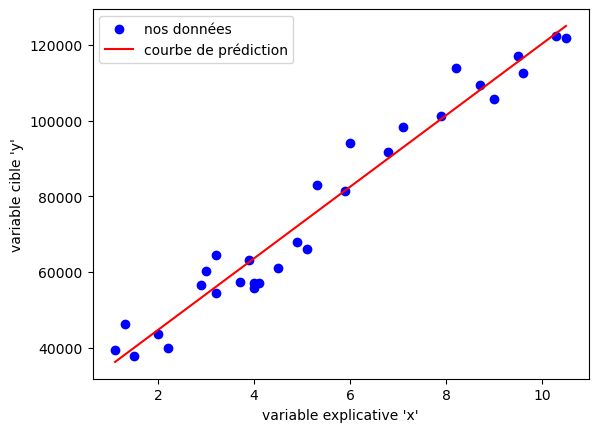

In [19]:
reg_plot(np.array(X),np.array(Y),linear_model)

Ensuite, nous pouvons calculer notre score de métriques pour notre modèle :

In [20]:
from sklearn.metrics import mean_squared_error, r2_score
Y_pred = linear_model.predict(np.array(X).reshape(-1, 1))
print("Mean squared error: %.2f"
      % mean_squared_error(Y, Y_pred))
print("Root mean squared error: %.2f"
      % np.sqrt(mean_squared_error(Y, Y_pred)))
print("R square: %.2f"% r2_score(Y, Y_pred))

Mean squared error: 31270951.72
Root mean squared error: 5592.04
R square: 0.96


### Évaluation du Modèle de Régression Linéaire

Pour évaluer la performance de notre modèle de régression linéaire, nous utilisons trois métriques principales : **Mean Squared Error (MSE)**, **Root Mean Squared Error (RMSE)** et **R² (R square)**.

#### Mean Squared Error (MSE)
- **À quoi ça sert** : Le MSE mesure la moyenne des carrés des erreurs, c'est-à-dire la différence entre les valeurs prédites par le modèle et les valeurs réelles.
- **Interprétation** : Une valeur de MSE plus faible indique que le modèle est plus précis. Dans notre cas, le MSE est de **31,270,951.72**.

#### Root Mean Squared Error (RMSE)
- **À quoi ça sert** : Le RMSE est la racine carrée du MSE. Il ramène l'erreur à la même unité que la variable cible, ce qui le rend plus facile à interpréter.
- **Interprétation** : Comme pour le MSE, une valeur de RMSE plus faible indique un modèle plus précis. Dans notre cas, le RMSE est de **5,592.04**.

#### R² (R square)
- **À quoi ça sert** : Le R², ou coefficient de détermination, mesure la proportion de la variance de la variable dépendante qui est expliquée par le modèle.
- **Interprétation** : Une valeur de R² proche de 1 indique que le modèle explique bien la variance des données. Dans notre cas, le R² est de **0.96**, ce qui signifie que 96% de la variance des données est expliquée par le modèle.

Ces métriques nous permettent d'évaluer la performance de notre modèle de régression linéaire et de comprendre à quel point il est précis et fiable.
